# Movimiento Caótico

### Péndulo Doble
En general, un péndulo doble o doble péndulo es un sistema compuesto por dos péndulos, con el segundo colgando del extremo del primero. En el caso más simple, se trata de dos péndulos simples, con el inferior colgando de la masa pendular del superior. 
Por encima de cierta energía, exhibe un **movimiento caótico**.

<img src="Double-compound-pendulum.gif">

In [1]:
from numpy import array, linspace
from math import sin, cos, pi
from pylab import plot, xlabel, ylabel, show
from scipy.integrate import odeint

from vpython import sphere, scene, vector, color, arrow, text, sleep

arrow_size = 0.1

arrow_x = arrow(pos=vector(0,0,0), axis=vector(arrow_size,0,0), color=color.red)
arrow_y = arrow(pos=vector(0,0,0), axis=vector(0,arrow_size,0), color=color.green)
arrow_z = arrow(pos=vector(0,0,0), axis=vector(0,0,arrow_size))

R = 0.02 #Radio de la esfera

def func (conds, t, g, l): #Función que devuelve valores de theta y omega(arreglo)
    dda=conds[4]
    ddb=conds[5]
    dphi1=conds[1]
    da=(1/2)*(-(conds[5])*cos(conds[0]-conds[2])-((conds[2])**2)*sin(conds[0]-conds[2]))-(g/l)*sin(conds[0])
    dphi2=conds[3]
    db=-(conds[4])*cos(conds[0]-conds[2])+((conds[1])**2)*sin(conds[0]-conds[2])-(g/l)*sin(conds[2])
    return array([dphi1,da,dphi2,db,dda,ddb], float)

g = 9.81
l = 0.1

phi1=45*pi/180.
a=0.
phi2=90*pi/180.
b=0.
da=0.
db=0.

initcond = array([phi1,a,phi2,b,da,db])

n_steps = 1000 #Número de pasos
t_start = 0.   #Tiempo inicial
t_final = 3.  #Tiempo final
t_delta = (t_final - t_start) / n_steps #Diferencial de tiempo (Paso temporal)
t = linspace(t_start, t_final, n_steps) #Arreglo de diferencial de tiempo

solu, outodeint = odeint( func, initcond, t, args = (g, l), full_output=True) #Solución de la ecuación diferencial(Parámetros acordes a los definidos en la función) 
#solu (Matriz de n filas y 2 columnas) es la solución diferencial para cada paso(columnas) de theta y omega


phi_1,aa,phi_2,bb,aaa,bbb = solu.T #Devuelve la matriz transpuesta (a cada una de las variables de la izquierda, theta y omega, le define el respectivo vector)

# =====================

scene.range = 0.4 #Tamaño de la ventana de fondo

xp = l*sin(phi1) #Pasa de coordenadas polares a cartesianas
yp = -l*cos(phi1)
zp = 0.

xs=l*(sin(phi1)+sin(phi2))
ys=-l*(cos(phi1)+cos(phi2))
zs=0.

sleeptime = 0.0001 #Tiempo con que se actualiza la posición de la partícula

prtcl = sphere(pos=vector(xp,yp,zp), radius=R, color=color.cyan) #Define objeto con que se va a trabajar
prtcls= sphere(pos=vector(xs,ys,zs), radius=R, color=color.red)

time_i = 0 #Contador que se mueve en el espacio temporal en el que se resolvió la ecuación diferencial
t_run = 0  #Tiempo en el que se ejecuta la animación

#for i in omega:
#    print(i)


while t_run < t_final: #ANIMACIÓN
    prtcl.pos = vector( l*sin(phi_1[time_i]), -l*cos(phi_1[time_i]), zp )
    prtcls.pos= vector( l*(sin(phi_1[time_i])+sin(phi_2[time_i])), -l*(cos(phi_1[time_i])+cos(phi_2[time_i])), zs )
    t_run += t_delta
    sleep(sleeptime)
    time_i += 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Atractor de Lorenz
## Sistema de Ecuaciones Diferenciales

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963; es un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre. 
El sistema de ecuaciones diferenciales de Lorenz de primer orden acopladas, tiene soluciones caóticas para ciertos valores de parámetros $a, b, c$, teniendo en cuenta las condiciones iniciales $x(0), y(0), z(0)$.

\begin{equation}
{
\frac{dx}{dt} = a(y-x)
}
\end{equation}

\begin{equation}
{
\frac{dy}{dt} = x(b-z)-y
}
\end{equation}

\begin{equation}
{
\frac{dz}{dt} = xy-cz
}
\end{equation}

Para ciertos valores de los parámetros $a , b , c$, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño, pero es usualmente $a = 10, c = \frac{8}{3}$ y b es variado.

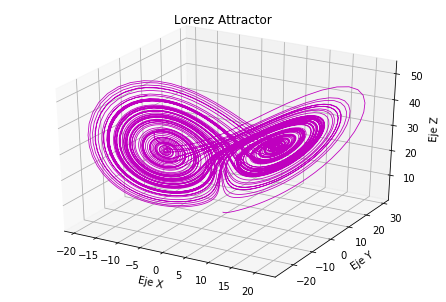

In [2]:
from numpy import * 
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

#Se definen las ecuaciones
def lorenz(x, y, z, a=10, c=2.667, b=28): # a=10, c=2.667, b=28
    x_der=a*(y-x)
    y_der=x*b-x*z-y
    z_der=(x*y)-(c*z)
    return x_der, y_der, z_der

dt = 0.01       # Tamaño del paso
n_steps = 10000 # Número de pasos

#Matrices vacias con 10001 posiciones (Necesita uno más para los valores iniciales)
xs = empty((n_steps + 1))
ys = empty((n_steps + 1))
zs = empty((n_steps + 1))

xs[0], ys[0], zs[0] = (0., 1., 1.05) #Valores Iniciales 0., 1., 1.05

for i in range(n_steps):
    x_der, y_der, z_der = lorenz(xs[i], ys[i], zs[i]) #Llama la función de Lorenz, guarda las soluciones para cada paso
    xs[i + 1] = xs[i] + (x_der * dt)
    ys[i + 1] = ys[i] + (y_der * dt)
    zs[i + 1] = zs[i] + (z_der * dt)
# Creamos la figura
fig = figure()
# Creamos el plano 3D
ax = Axes3D(fig)

plot(xs,ys,zs,'m',lw=0.8)
xlabel('Eje X')
ylabel('Eje Y')
ax.set_zlabel("Eje Z")
title("Lorenz Attractor")
grid('on',ls='-.')
show()

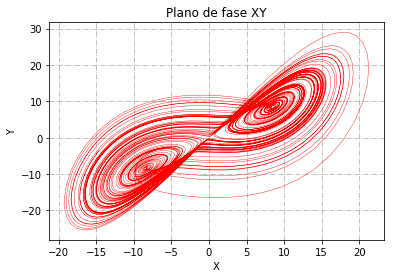

In [3]:
plot(xs, ys,'r',lw=0.4)
title("Plano de fase XY")
xlabel('X')
ylabel('Y')
grid('on',ls='-.')

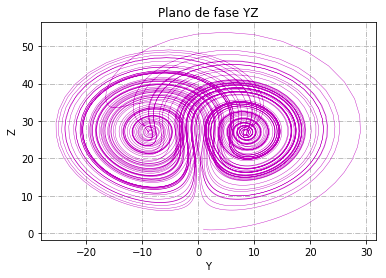

In [4]:
plot(ys, zs,'m',lw=0.4)
title("Plano de fase YZ")
xlabel('Y')
ylabel('Z')
grid('on',ls='-.')

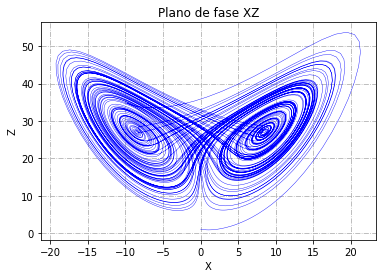

In [5]:
plot(xs, zs,'b',lw=0.4)
title("Plano de fase XZ")
xlabel('X')
ylabel('Z')
grid('on',ls='-.')

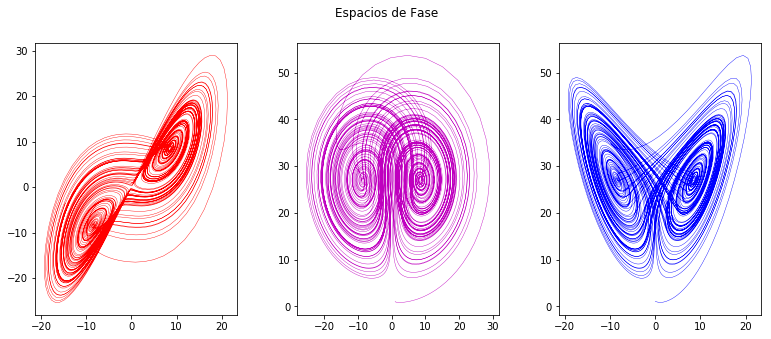

In [6]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
fig.subplots_adjust(hspace=1,wspace=0.3)
suptitle('Espacios de Fase')
ax1.plot(xs, ys,'r',lw=0.4)
ax2.plot(ys, zs,'m',lw=0.4)
ax3.plot(xs, zs,'b',lw=0.4)
show()

Tomando un dt más pequeño y variando los parámetros iniciales en una unidad aproximadamente, se observa un gran cambio en el comportamiento

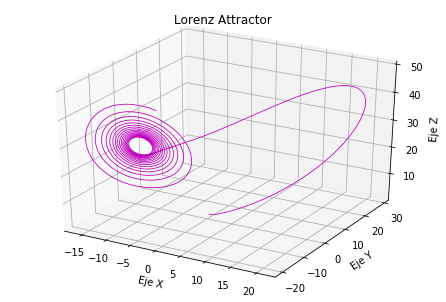

In [7]:
def lorenz(x, y, z, a=11, c=3, b=29): # a=10, c=2.667, b=28
    x_der=a*(y-x)
    y_der=x*b-x*z-y
    z_der=(x*y)-(c*z)
    return x_der, y_der, z_der

dt = 0.001       # Tamaño del paso
n_steps = 10000  # Número de pasos

#Matrices vacias con 10001 posiciones (Necesita uno más para los valores iniciales)
xs = empty((n_steps + 1))
ys = empty((n_steps + 1))
zs = empty((n_steps + 1))

xs[0], ys[0], zs[0] = (0, 1, 1.05) #Valores Iniciales 0., 1., 1.05

#f = odeint(lorenz, (xs[0], ys[0], zs[0]), t, args=(a, c, b))
#xs, ys, zs = f.T

for i in range(n_steps):
    x_der, y_der, z_der = lorenz(xs[i], ys[i], zs[i]) #Llama la función de Lorenz, guarda las soluciones para cada paso
    xs[i + 1] = xs[i] + (x_der * dt)
    ys[i + 1] = ys[i] + (y_der * dt)
    zs[i + 1] = zs[i] + (z_der * dt)
# Creamos la figura
fig = figure()
# Creamos el plano 3D
ax = Axes3D(fig)

plot(xs,ys,zs,'m',lw=0.8)
xlabel('Eje X')
ylabel('Eje Y')
ax.set_zlabel("Eje Z")
title("Lorenz Attractor")
grid('on',ls='-.')
show()

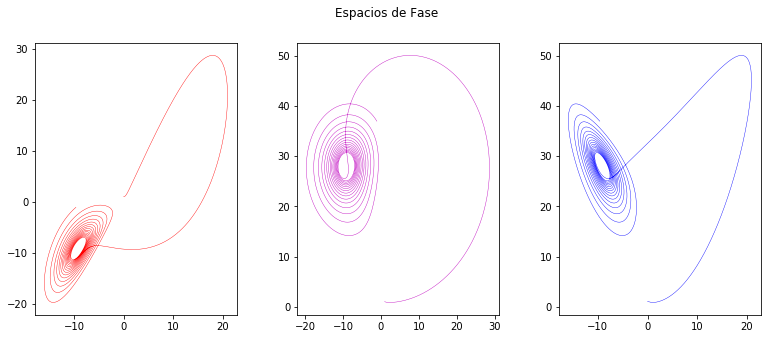

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
fig.subplots_adjust(hspace=1,wspace=0.3)
suptitle('Espacios de Fase')
ax1.plot(xs, ys,'r',lw=0.4)
ax2.plot(ys, zs,'m',lw=0.4)
ax3.plot(xs, zs,'b',lw=0.4)
show()

Cuando se habla de **movimiento caótico**, se refiere a ciertos tipos de sistemas complejos y sistemas dinámicos no lineales muy sensibles a las variaciones en las condiciones iniciales. Pequeñas variaciones en dichas condiciones iniciales pueden implicar grandes diferencias en el comportamiento futuro, imposibilitando la predicción a largo plazo. Esto sucede aunque estos sistemas son en rigor deterministas, es decir; su comportamiento puede ser completamente determinado conociendo sus condiciones iniciales.
Lo anterior se observa precisamente en el sistema de Lorenz anteriormente solucionado, pues no se supone que al variar levemente en una unidad los parámetros iniciales, el comportamiento final del sistema sea tan drástico, por lo tanto, en este sistema no se puede determinar el comportamiento a largo plazo de manera rigurosa.   

Con el mismo dt pero con $b=7$

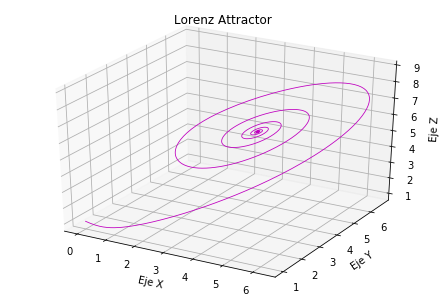

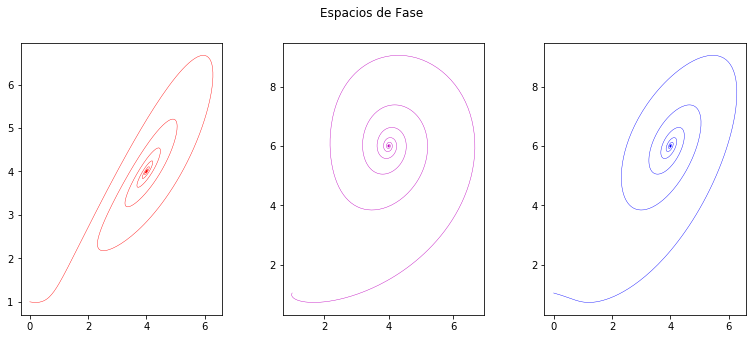

In [9]:
def lorenz(x, y, z, a=10, c=2.667, b=7): # a=10, c=2.667, b=28
    x_der=a*(y-x)
    y_der=x*b-x*z-y
    z_der=(x*y)-(c*z)
    return x_der, y_der, z_der

dt = 0.01       # Tamaño del paso
n_steps = 10000  # Número de pasos

#Matrices vacias con 10001 posiciones (Necesita uno más para los valores iniciales)
xs = empty((n_steps + 1))
ys = empty((n_steps + 1))
zs = empty((n_steps + 1))

xs[0], ys[0], zs[0] = (0, 1, 1.05) #Valores Iniciales 0., 1., 1.05

#f = odeint(lorenz, (xs[0], ys[0], zs[0]), t, args=(a, c, b))
#xs, ys, zs = f.T

for i in range(n_steps):
    x_der, y_der, z_der = lorenz(xs[i], ys[i], zs[i]) #Llama la función de Lorenz, guarda las soluciones para cada paso
    xs[i + 1] = xs[i] + (x_der * dt)
    ys[i + 1] = ys[i] + (y_der * dt)
    zs[i + 1] = zs[i] + (z_der * dt)
# Creamos la figura
fig = figure()
# Creamos el plano 3D
ax = Axes3D(fig)

plot(xs,ys,zs,'m',lw=0.8)
xlabel('Eje X')
ylabel('Eje Y')
ax.set_zlabel("Eje Z")
title("Lorenz Attractor")
grid('on',ls='-.')
show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
fig.subplots_adjust(hspace=1,wspace=0.3)
suptitle('Espacios de Fase')
ax1.plot(xs, ys,'r',lw=0.4)
ax2.plot(ys, zs,'m',lw=0.4)
ax3.plot(xs, zs,'b',lw=0.4)
show()